In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

raw_data = pd.read_json('oto_sample.json')

specs_data = pd.json_normalize(raw_data["specs"])

num_km = specs_data["Số Km đã đi"]
def conv_km_to_num(km_str):
	if isinstance(km_str, str):
		km_str = km_str.replace(" Km", "").replace(",", "")
		try:
			return int(km_str)
		except ValueError:
			return np.nan
	return np.nan
num_km = num_km.apply(conv_km_to_num)

print(f"Số lượng giá trị ban đầu: {len(num_km)}")
print(f"giá trị min: {num_km.min()}")
print(f"giá trị max: {num_km.max()}")


Số lượng giá trị ban đầu: 7816
giá trị min: 0
giá trị max: 27000000


In [ ]:

# Loại bỏ ngoại lệ sử dụng IQR
Q1 = num_km.quantile(0.25)
Q3 = num_km.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

num_km_clean = num_km[
    (num_km >= lower_bound) & (num_km <= upper_bound)
]

print(f"giá trị cận dưới: {lower_bound}")
print(f"giá trị cận trên: {upper_bound}")
print(f"Số lượng dữ liệu ban đầu: {len(num_km)}")
print(f"Số lượng dữ liệu sau khi loại bỏ ngoại lệ: {len(num_km_clean)}")
print(f"Số lượng ngoại lệ bị loại bỏ: {len(num_km) - len(num_km_clean)}")

giá trị cận dưới: -39500.0
giá trị cận trên: 92500.0
Số lượng dữ liệu ban đầu: 7816
Số lượng dữ liệu sau khi loại bỏ ngoại lệ: 7687
Số lượng ngoại lệ bị loại bỏ: 129


Text(0.5, 1.0, 'Phân phối dữ liệu sau chuẩn hóa (Z-score)')

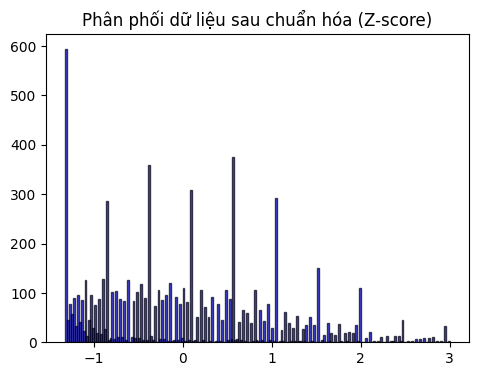

In [43]:
# Chuẩn hóa dữ liệu sử dụng Z-score
mean_km = num_km_clean.mean()
std_km = num_km_clean.std()
z_scores = (num_km_clean - mean_km) / std_km

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(z_scores, bins=200, alpha=0.7, color='blue', edgecolor='black')
plt.title('Phân phối dữ liệu sau chuẩn hóa (Z-score)')

In [36]:
import scipy.stats as stats

n = len(num_km_clean)  
sample_mean = num_km_clean.mean()  
sample_std = num_km_clean.std()  

print(f"Kích thước mẫu (n): {n:,}")
print(f"Trung bình mẫu (x̄): {sample_mean:,.2f} km")
print(f"Độ lệch chuẩn mẫu (s): {sample_std:,.2f} km")

confidence_level = 0.95
alpha = 1 - confidence_level

z_alpha = stats.norm.ppf(1 - alpha/2)

print(f"\nMức tin cậy: {confidence_level*100}%")
print(f"Mức ý nghĩa (alpha): {alpha:.2f}")
print(f"Giá trị Z: {z_alpha:.4f}")

margin_error = z_alpha * (sample_std / np.sqrt(n))
lower_bound = sample_mean - margin_error
upper_bound = sample_mean + margin_error

print(f"\nKẾT QUẢ ƯỚC LƯỢNG:")
print(f"Sai số ước lượng (ME): ±{margin_error:,.2f} km")
print(f"Khoảng tin cậy 95%: [{lower_bound:,.0f}, {upper_bound:,.0f}] km")

Kích thước mẫu (n): 7,687
Trung bình mẫu (x̄): 27,816.63 km
Độ lệch chuẩn mẫu (s): 21,054.66 km

Mức tin cậy: 95.0%
Mức ý nghĩa (alpha): 0.05
Giá trị Z: 1.9600

KẾT QUẢ ƯỚC LƯỢNG:
Sai số ước lượng (ME): ±470.67 km
Khoảng tin cậy 95%: [27,346, 28,287] km


In [37]:
# KIỂM ĐỊNH GIẢ THUYẾT THEO CÁC BƯỚC CHUẨN
print("KIỂM ĐỊNH GIẢ THUYẾT: SỐ KM TRUNG BÌNH < 30,000 KM")
print("="*60)

# BƯỚC 1: Đặt giả thuyết H0 và đối thuyết H1
print("BƯỚC 1: ĐẶT GIẢ THUYẾT")
print("-" * 30)
print("H₀: μ ≥ 30,000 (số km trung bình ≥ 30,000)")
print("H₁: μ < 30,000 (số km trung bình < 30,000)")
print("Loại kiểm định: One-tailed test (kiểm định một phía bên trái)")

# BƯỚC 2: Xác định miền bác bỏ H0
alpha = 0.05
print(f"\nBƯỚC 2: XÁC ĐỊNH MIỀN BÁC BỎ")
print("-" * 30)
print(f"Mức ý nghĩa: α = {alpha}")
print("Vì H₁: μ < μ₀, miền bác bỏ W_α = (-∞, -z_α)")

# Tính giá trị tới hạn
z_critical = stats.norm.ppf(alpha)
print(f"Giá trị tới hạn: z_α = {z_critical:.4f}")
print(f"Miền bác bỏ: W_α = (-∞, {z_critical:.4f})")

# BƯỚC 3: Tính giá trị quan sát
print(f"\nBƯỚC 3: TÍNH GIÁ TRỊ QUAN SÁT")
print("-" * 30)

# Thông số mẫu
n = len(num_km_clean)
sample_mean = num_km_clean.mean()
sample_std = num_km_clean.std()
mu_0 = 30000

print(f"Kích thước mẫu (n): {n:,}")
print(f"Trung bình mẫu (x̄): {sample_mean:,.2f} km")
print(f"Độ lệch chuẩn mẫu (s): {sample_std:,.2f} km")
print(f"Giá trị giả thuyết (μ₀): {mu_0:,} km")

# Tính thống kê kiểm định
z_stat = (sample_mean - mu_0) / (sample_std / np.sqrt(n))
print(f"\nThống kê kiểm định:")
print(f"z_qs = (x̄ - μ₀)/(s/√n) = ({sample_mean:.2f} - {mu_0})/(({sample_std:.2f})/√{n})")
print(f"z_qs = {z_stat:.4f}")

# BƯỚC 4: Kết luận
print(f"\nBƯỚC 4: KẾT LUẬN")
print("-" * 30)
print(f"Giá trị quan sát: z_qs = {z_stat:.4f}")
print(f"Miền bác bỏ: W_α = (-∞, {z_critical:.4f})")

if z_stat < z_critical:
    print(f"Vì z_qs = {z_stat:.4f} < {z_critical:.4f} = z_α")
    print("⟹ z_qs ∈ W_α")
    print("KẾT LUẬN: BÁC BỎ giả thuyết H₀")
    print("Có bằng chứng thống kê cho rằng số km trung bình < 30,000 km")
else:
    print(f"Vì z_qs = {z_stat:.4f} ≥ {z_critical:.4f} = z_α")
    print("⟹ z_qs ∉ W_α")
    print("KẾT LUẬN: KHÔNG BÁC BỎ giả thuyết H₀")
    print("Không có đủ bằng chứng để kết luận số km trung bình < 30,000 km")

# Tính p-value để kiểm chứng
p_value = stats.norm.cdf(z_stat)
print(f"\nKIỂM CHỨNG BẰNG P-VALUE:")
print(f"P-value = P(Z < {z_stat:.4f}) = {p_value:.6f}")
print(f"So sánh: P-value = {p_value:.6f} {'<' if p_value < alpha else '≥'} α = {alpha}")
print(f"Kết luận: {'Bác bỏ H₀' if p_value < alpha else 'Không bác bỏ H₀'}")

KIỂM ĐỊNH GIẢ THUYẾT: SỐ KM TRUNG BÌNH < 30,000 KM
BƯỚC 1: ĐẶT GIẢ THUYẾT
------------------------------
H₀: μ ≥ 30,000 (số km trung bình ≥ 30,000)
H₁: μ < 30,000 (số km trung bình < 30,000)
Loại kiểm định: One-tailed test (kiểm định một phía bên trái)

BƯỚC 2: XÁC ĐỊNH MIỀN BÁC BỎ
------------------------------
Mức ý nghĩa: α = 0.05
Vì H₁: μ < μ₀, miền bác bỏ W_α = (-∞, -z_α)
Giá trị tới hạn: z_α = -1.6449
Miền bác bỏ: W_α = (-∞, -1.6449)

BƯỚC 3: TÍNH GIÁ TRỊ QUAN SÁT
------------------------------
Kích thước mẫu (n): 7,687
Trung bình mẫu (x̄): 27,816.63 km
Độ lệch chuẩn mẫu (s): 21,054.66 km
Giá trị giả thuyết (μ₀): 30,000 km

Thống kê kiểm định:
z_qs = (x̄ - μ₀)/(s/√n) = (27816.63 - 30000)/((21054.66)/√7687)
z_qs = -9.0919

BƯỚC 4: KẾT LUẬN
------------------------------
Giá trị quan sát: z_qs = -9.0919
Miền bác bỏ: W_α = (-∞, -1.6449)
Vì z_qs = -9.0919 < -1.6449 = z_α
⟹ z_qs ∈ W_α
KẾT LUẬN: BÁC BỎ giả thuyết H₀
Có bằng chứng thống kê cho rằng số km trung bình < 30,000 km

KIỂM CHỨ